<a href="https://colab.research.google.com/github/pavanreddy2307/NLP/blob/main/projects/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df=pd.read_csv("all-data.csv", encoding="ISO-8859-1")
df.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   News       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [17]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [19]:
X=df["News"].values.reshape(-1,1)
y=df['Sentiment'].values.reshape(-1,1)
X.shape,y.shape


((4846, 1), (4846, 1))

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
df1=pd.DataFrame(X_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})

df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,"In Russia , Raisio 's Food Division 's home ma...",neutral
1,Operators only need to learn how to use one de...,neutral
2,The company expects its net sales in the first...,positive
3,The bridge will be 1.2 km long and is located ...,neutral
4,Nokia and Capcom announced that Resident Evil ...,neutral


In [24]:
df3=pd.DataFrame(X_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'sentiment'})

df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,The company was supposed to deliver machinery ...,neutral
1,UNC Charlotte would also deploy SSH Tectia Con...,neutral
2,"In 2009 , Lee & Man had a combined annual prod...",neutral
3,`` That 's a very high figure on the European ...,neutral
4,"In Finland , the corresponding service is Alma...",neutral


In [25]:
# @title removing punctuations
import string

def remove_punctuation(text):
  if(type(text)==float):
    return text
  return ''.join([i for i in text if i not in string.punctuation])

In [27]:
df_train['news']=df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']=df_test['news'].apply(lambda x:remove_punctuation(x))

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
def generate_N_grams(text,ngram=1):
  text=text.lower()
  words=[word for word in word_tokenize(text) if word not in (stopwords.words('english')) ]
  #print(words)

  temp=zip(*[words[i:] for i in range(0,ngram)])
  return [" ".join(ngram) for ngram in temp]

`zip` wants a bunch of arguments to zip together, but what you have is a single argument (a list, whose elements are also lists). The `*` in a function call "unpacks" a list (or other iterable), making each of its elements a separate argument. So without the `*`, you're doing `zip( [[1,2,3],[4,5,6]] )`. With the `*`, you're doing `zip([1,2,3], [4,5,6])`

`>>>p = [[1,2,3],[4,5,6]]`

```
>>>d=zip(p)
>>>list(d)
```
> [([1, 2, 3]), ([4, 5, 6])]

```
>>>d=zip(*p)
>>>list(d)
```

> [(1, 4), (2, 5), (3, 6)]



In [43]:
generate_N_grams("The sun rises in the east",2)

['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [38]:
from collections import defaultdict

In [82]:
postiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [83]:
#get the count of every word in both the columsn of train test data where sentiment='postive'
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    postiveValues[word]+=1
postiveValues

defaultdict(int,
            {'company': 189,
             'expects': 19,
             'net': 156,
             'sales': 159,
             'first': 56,
             'half': 7,
             '2008': 65,
             'reach': 8,
             'previous': 8,
             'year': 104,
             'level': 7,
             'time': 11,
             'delighted': 4,
             'fact': 1,
             'able': 13,
             'accomplish': 1,
             'organization': 2,
             'team': 4,
             'members': 7,
             'launch': 6,
             'new': 63,
             '3g': 5,
             'handsets': 3,
             'nokia': 32,
             'aims': 10,
             'become': 3,
             'winner': 1,
             'china': 13,
             'market': 49,
             '2g': 2,
             'chf': 1,
             'great': 3,
             'product': 9,
             'eps': 21,
             'continuing': 6,
             'operations': 42,
             'came': 7,
             '030

In [84]:
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1


In [85]:
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1


In [86]:
df_postive=pd.DataFrame(sorted(postiveValues.items(),key=lambda x:x[1], reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1], reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1], reverse=True))

In [95]:
df_postive.head()

,0,1
0,eur,359
1,company,189
2,mn,185
3,said,170
4,sales,159


In [96]:
df_negative.head()

,0,1
0,eur,267
1,mn,178
2,profit,121
3,net,85
4,finnish,82


In [97]:
df_neutral.head()

,0,1
0,company,414
1,eur,207
2,said,185
3,finland,176
4,finnish,171


In [90]:
pd1=df_postive[0][:10]
pd2=df_postive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

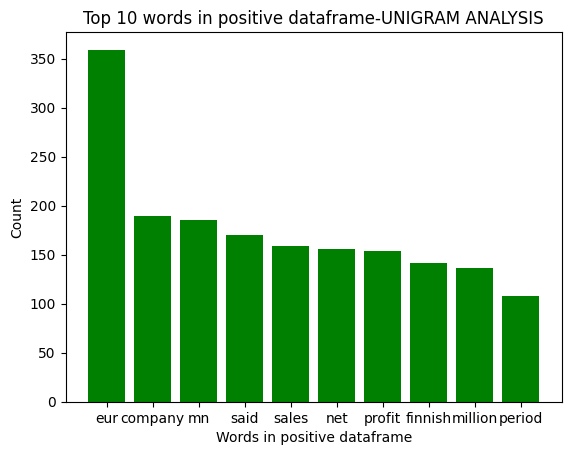

In [94]:
plt.figure()
plt.bar(pd1,pd2, color ='green',width = 0.8)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()


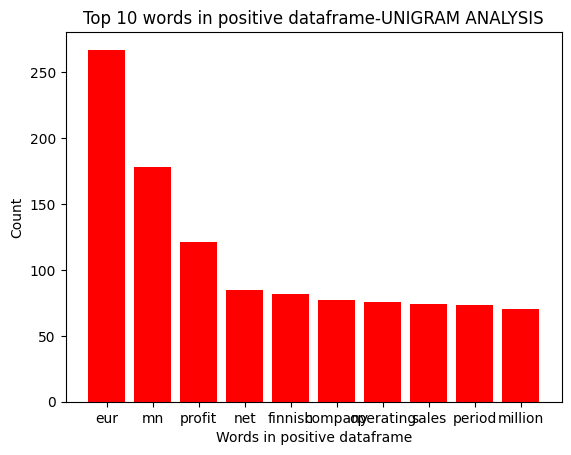

In [98]:
plt.figure()
plt.bar(ned1,ned2, color ='red',width = 0.8)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()


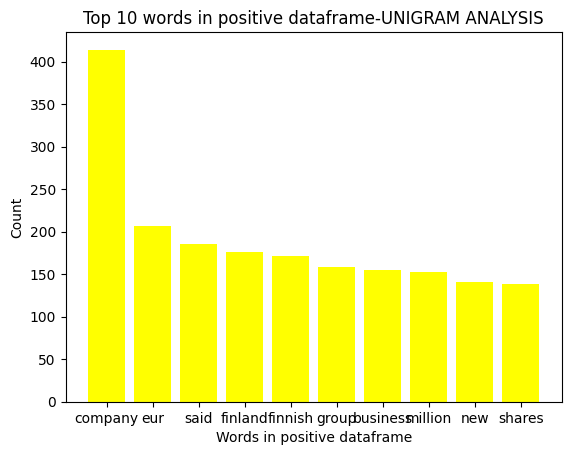

In [100]:
plt.figure(1)
plt.bar(nud1,nud2, color ='yellow',width = 0.8)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()


In [103]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

In [105]:
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

In [106]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [107]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

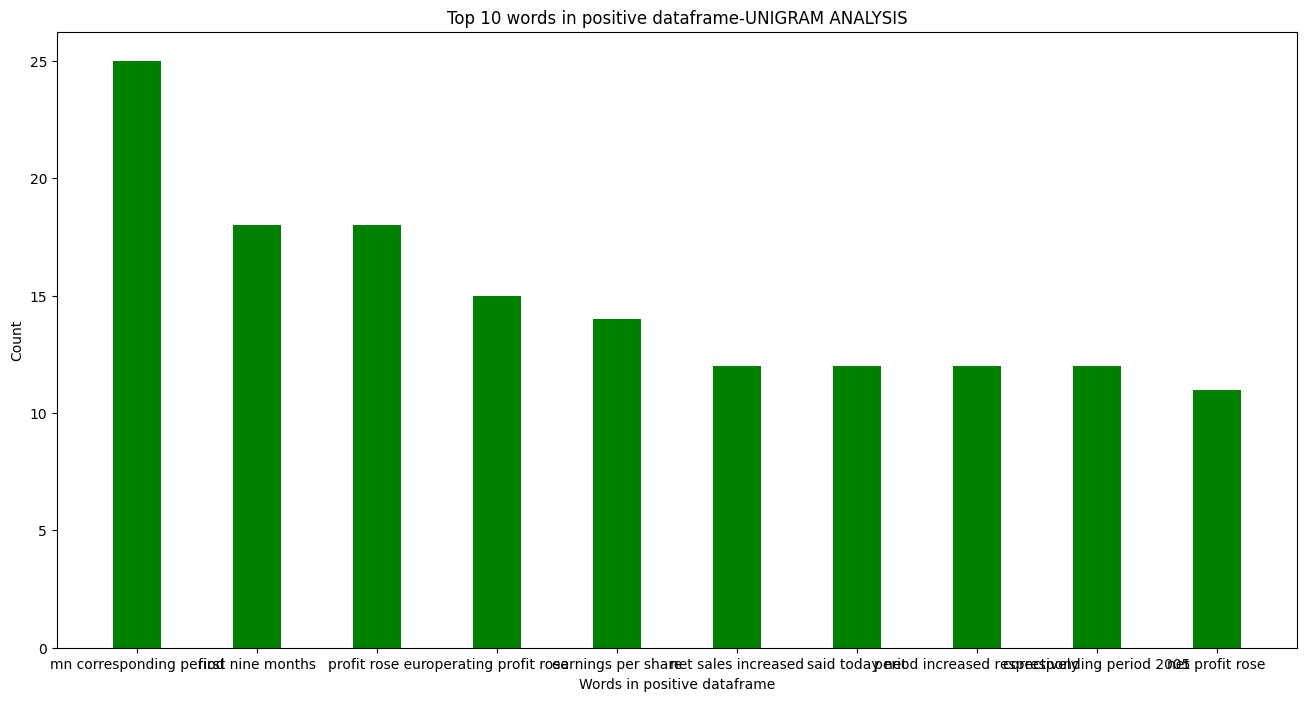

In [115]:
plt.figure(figsize=(16,8))
plt.bar(pd1tri,pd2tri, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

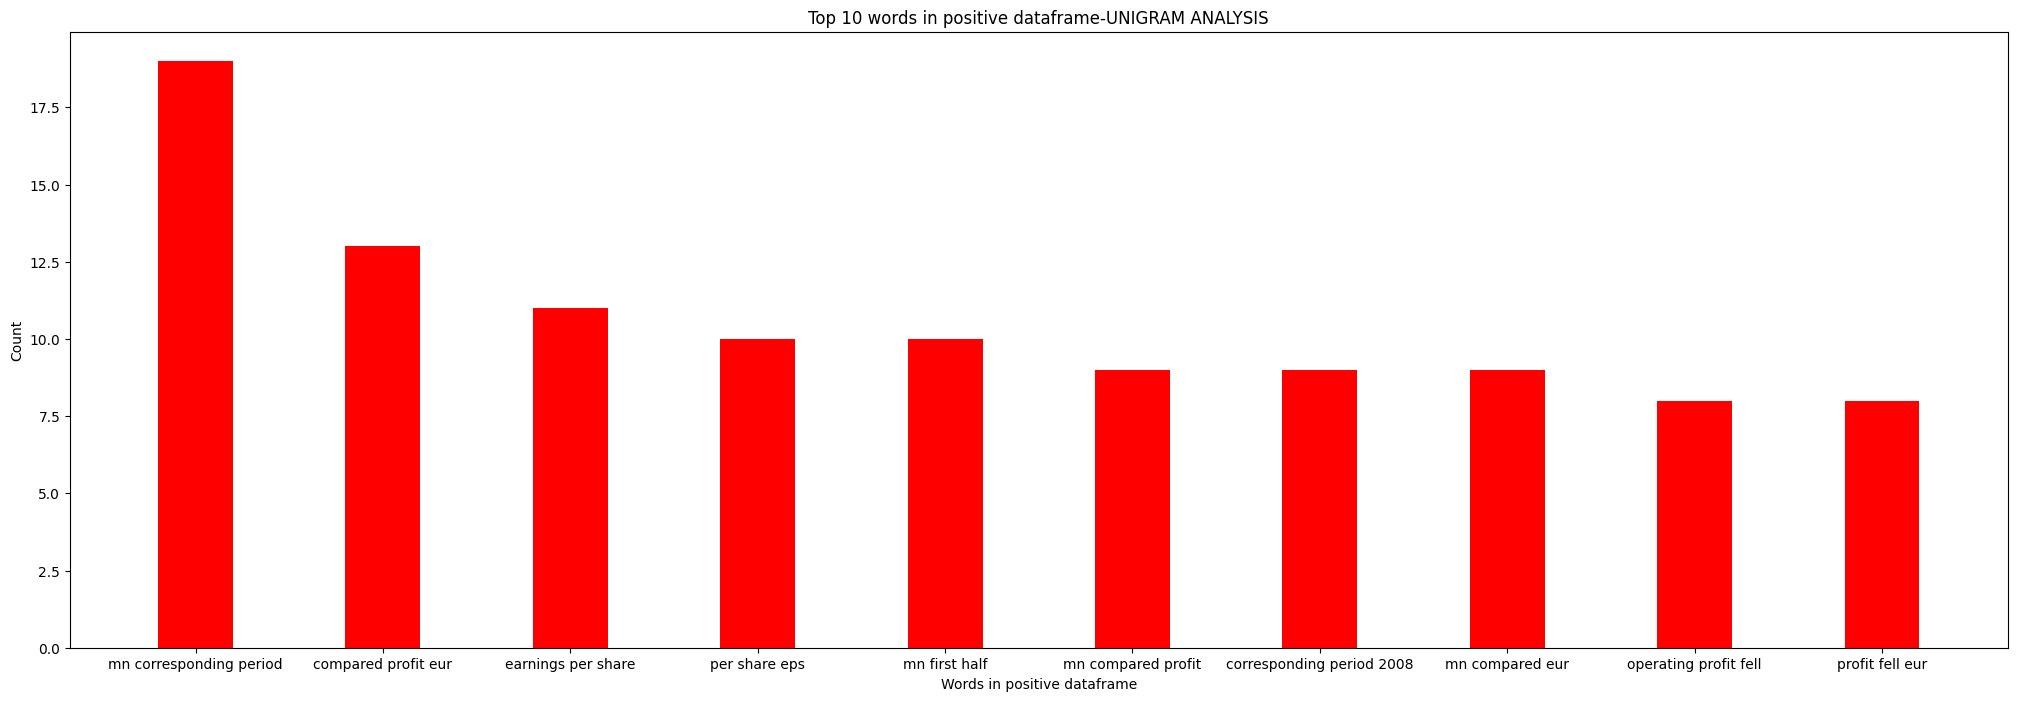

In [117]:
plt.figure(figsize=(25,8))
plt.bar(ned1tri,ned2tri, color ='red',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()


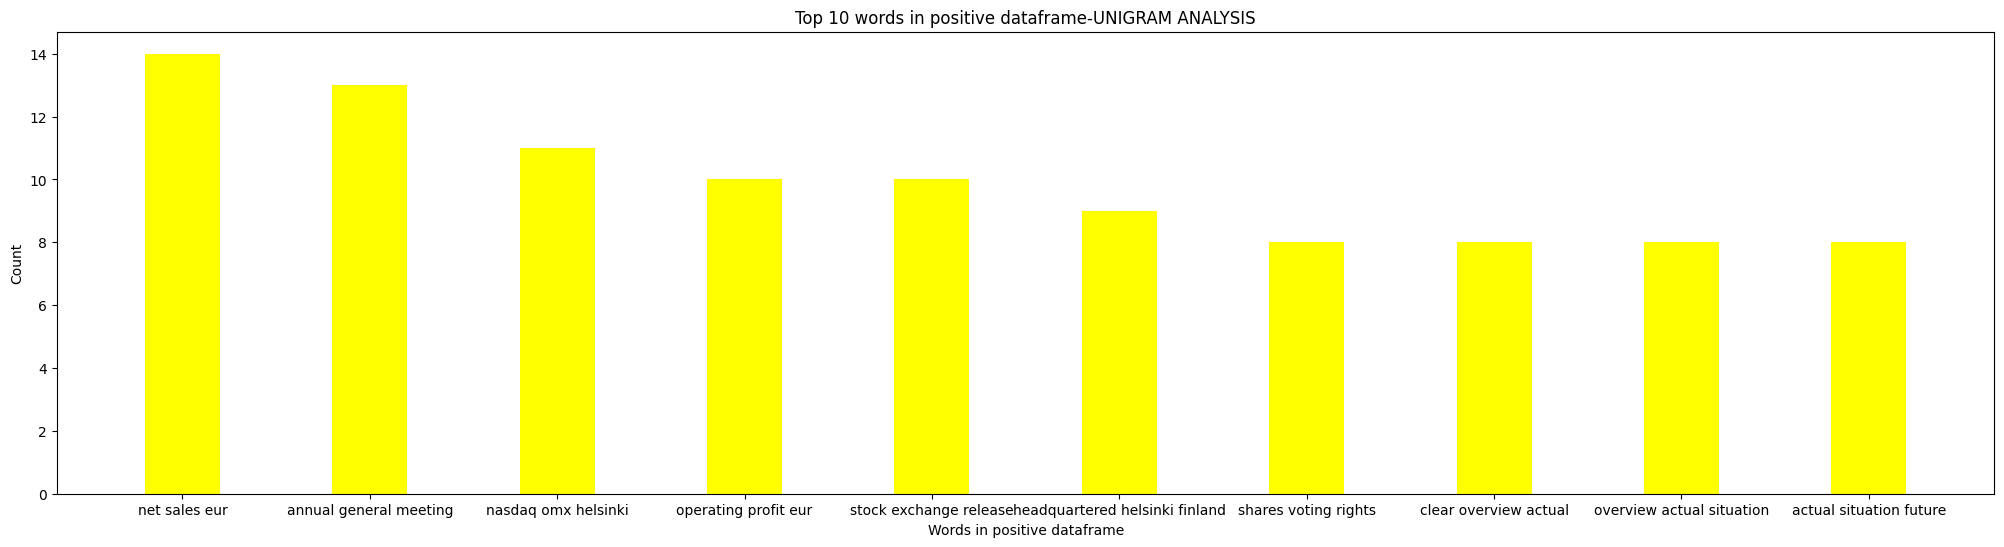

In [120]:
plt.figure(figsize=(25,6))
plt.bar(nud1tri,nud2tri, color ='yellow',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()